In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification






# Read data

In [2]:
df = pd.read_csv("../data/credit_data.csv")

In [3]:
#melihat 5 kolom atas 
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.isna().sum()



Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
modus = df['Saving accounts'].mode()[0]
df['Saving accounts'] = df['Saving accounts'].fillna(modus)
df['Saving accounts'].isna().sum()

modus = df['Checking account'].mode()[0]

df['Checking account'] = df['Checking account'].fillna(modus)
df['Checking account'].isna().sum()
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
data = df
data.drop(columns = 'Unnamed: 0', inplace =True)


# EDA

In [8]:
df.describe()


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
df.describe(include=['object'])


,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,1000,1000,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,786,668,337,700


In [10]:
numeric = ['Age', 'Job', 'Credit amount', 'Duration']
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

male      690
female    310
Name: Sex, dtype: int64

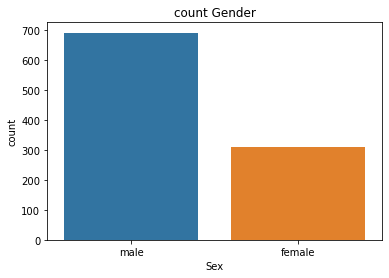

In [11]:
 sns.countplot(data.Sex).set_title("count Gender");

data.Sex.value_counts()


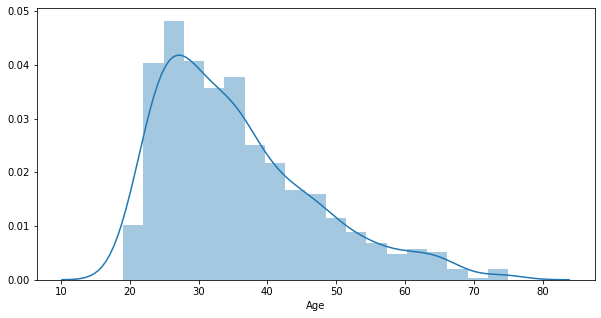

In [12]:
fig, ax = plt.subplots(1,figsize=(10,5))

sns.distplot(data.Age)


good    700
bad     300
Name: Risk, dtype: int64

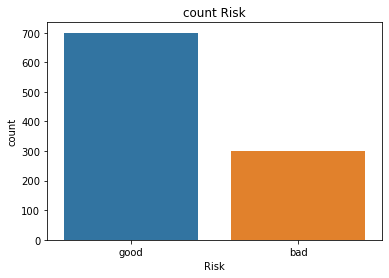

In [13]:
 sns.countplot(data.Risk).set_title("count Risk");

data.Risk.value_counts()



2    630
1    200
3    148
0     22
Name: Job, dtype: int64

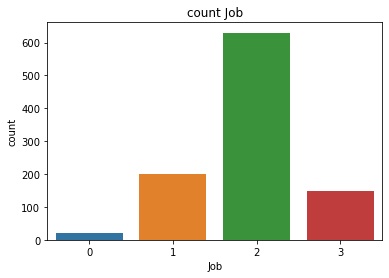

In [14]:
 sns.countplot(data.Job).set_title("count Job");

 data.Job.value_counts()


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

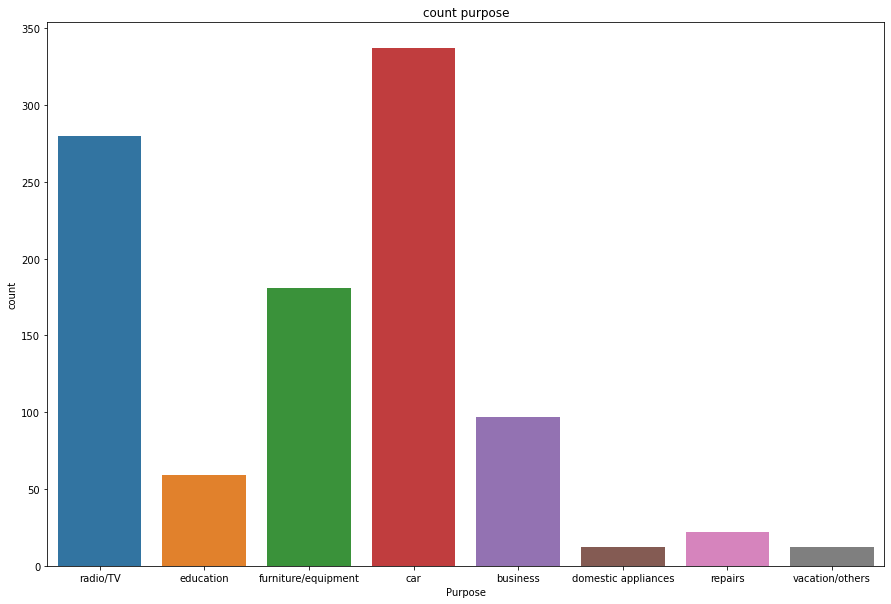

In [15]:
fig, ax = plt.subplots(1,figsize=(15,10))

sns.countplot(data.Purpose).set_title("count purpose");

data.Purpose.value_counts()


own     713
rent    179
free    108
Name: Housing, dtype: int64

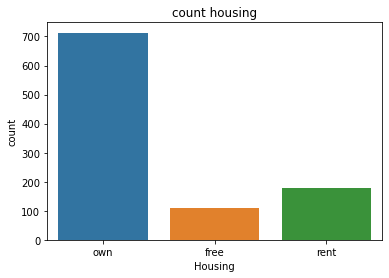

In [16]:
sns.countplot(data.Housing).set_title("count housing");
data.Housing.value_counts()




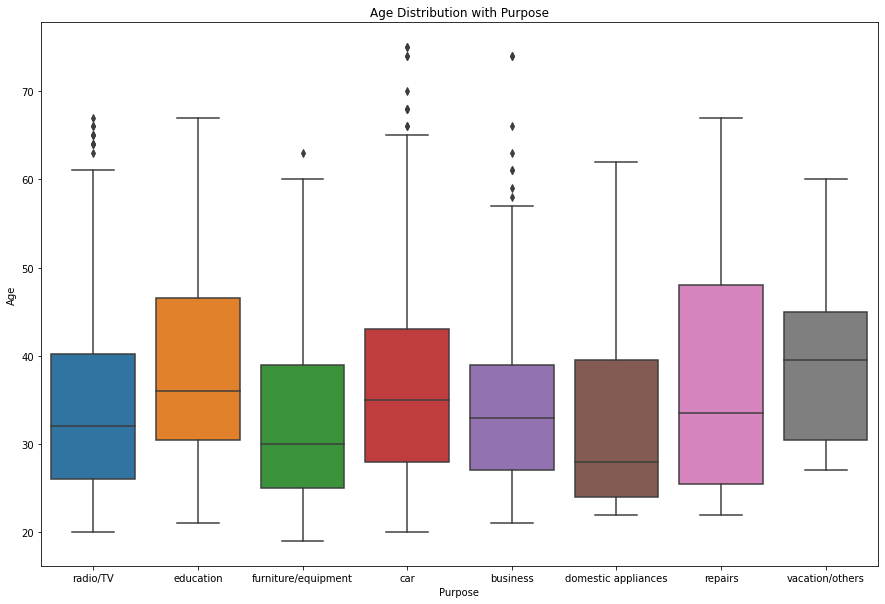

In [17]:
fig, ax = plt.subplots(1,figsize=(15,10))

sns.boxplot(data=data, x='Purpose', y="Age").set_title("Age Distribution with Purpose");


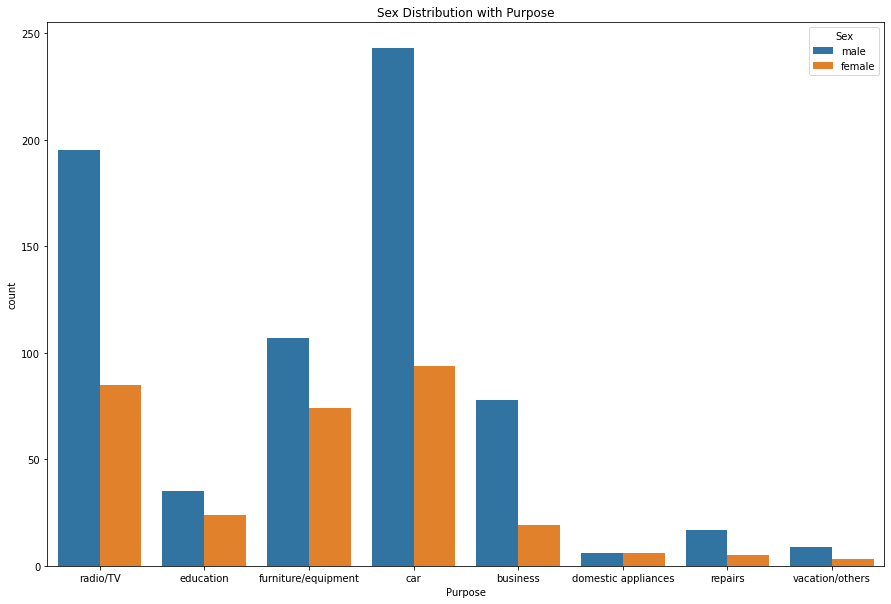

In [18]:
fig, ax = plt.subplots(1,figsize=(15,10))

sns.countplot(data=data, x='Purpose', hue="Sex").set_title("Sex Distribution with Purpose");


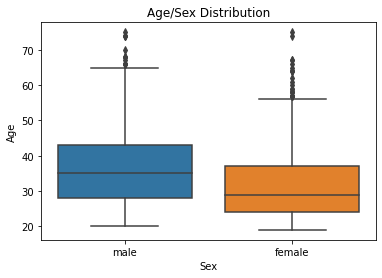

In [19]:
sns.boxplot(data=data, x="Sex", y="Age").set_title("Age/Sex Distribution");


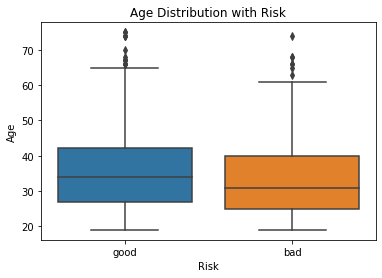

In [20]:

sns.boxplot(data=data, x='Risk', y='Age').set_title("Age Distribution with Risk");


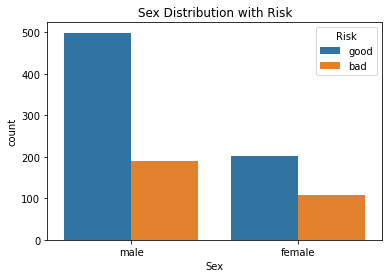

In [21]:

sns.countplot(data=data, x="Sex", hue="Risk").set_title("Sex Distribution with Risk");


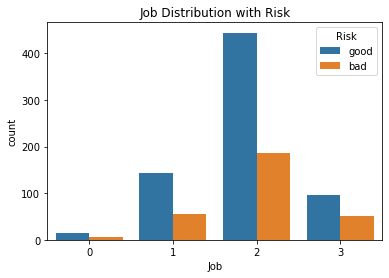

In [22]:
sns.countplot(data=data, x="Job", hue="Risk").set_title("Job Distribution with Risk");

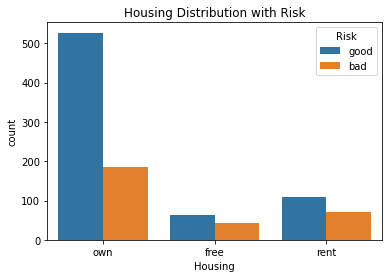

In [23]:
sns.countplot(data=data, x="Housing", hue="Risk").set_title("Housing Distribution with Risk");

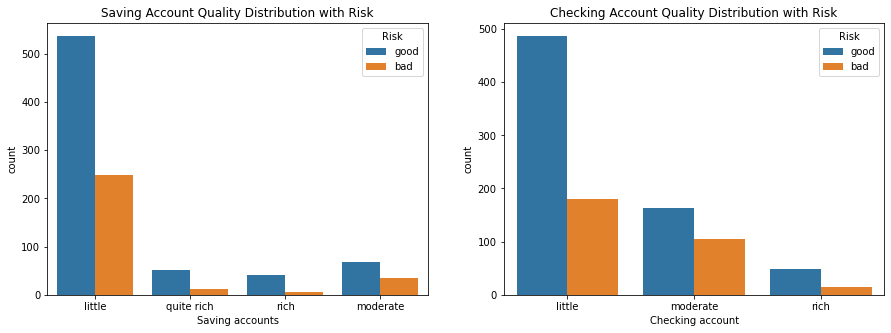

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=data, x="Saving accounts", hue="Risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk");
sns.countplot(data=data, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk");

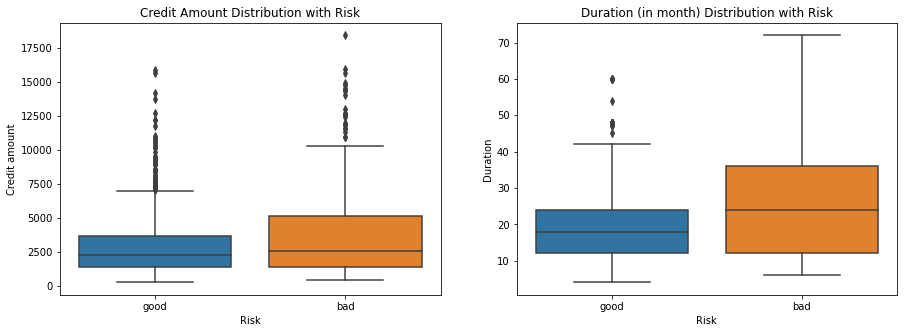

In [25]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Credit amount', ax=ax[0]).set_title("Credit Amount Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

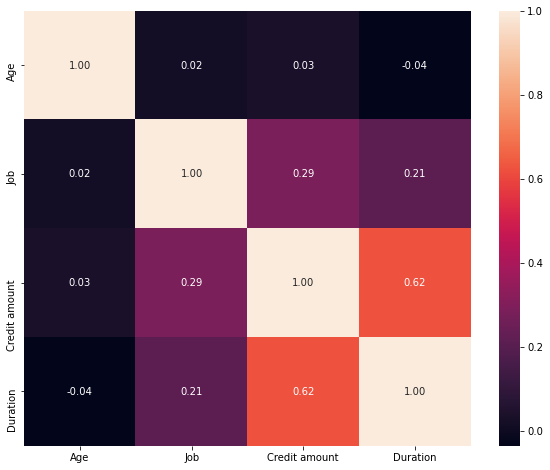

In [26]:

corr = data.corr()
plt.figure(figsize=(10,8));
sns.heatmap(corr, annot=True, fmt='.2f');

# preprosessing

In [27]:
encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
for label in categorical:
    data[label] = encoder.fit_transform(data[label])


In [28]:
data[categorical]

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
0,1,1,0,0,5,1
1,0,1,0,1,5,0
2,1,1,0,0,3,1
3,1,0,0,0,4,1
4,1,0,0,0,1,0
...,...,...,...,...,...,...
995,0,1,0,0,4,1
996,1,1,0,0,1,1
997,1,1,0,0,5,1
998,1,0,0,0,5,0


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,0.670280,0.146949,-0.133710,-0.463409,-0.653831,-0.745131,-1.236478,1.073263,0.654654
1,-1.191404,-1.491914,0.146949,-0.133710,-0.463409,1.001437,0.949817,2.248194,1.073263,-1.527525
2,1.183312,0.670280,-1.383771,-0.133710,-0.463409,-0.653831,-0.416562,-0.738668,0.061705,0.654654
3,0.831502,0.670280,0.146949,-2.016956,-0.463409,-0.653831,1.634247,1.750384,0.567484,0.654654
4,1.535122,0.670280,0.146949,-2.016956,-0.463409,-0.653831,0.566664,0.256953,-0.949853,-1.527525


In [30]:
X, y = df.drop("Risk", axis=1), df["Risk"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)



# Modelling 

In [31]:
dtc = DecisionTreeClassifier(random_state=2020)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(confusion_matrix(dtc_pred, y_test))
print('-----')
print(classification_report(dtc_pred, y_test, digits=4))

[[ 18  41]
 [ 40 101]]
-----
              precision    recall  f1-score   support

           0     0.3103    0.3051    0.3077        59
           1     0.7113    0.7163    0.7138       141

    accuracy                         0.5950       200
   macro avg     0.5108    0.5107    0.5107       200
weighted avg     0.5930    0.5950    0.5940       200



In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(knn_pred, y_test))
print('-----')
print(classification_report(knn_pred, y_test, digits=4))

[[ 13  25]
 [ 45 117]]
-----
              precision    recall  f1-score   support

           0     0.2241    0.3421    0.2708        38
           1     0.8239    0.7222    0.7697       162

    accuracy                         0.6500       200
   macro avg     0.5240    0.5322    0.5203       200
weighted avg     0.7100    0.6500    0.6749       200



In [33]:
lr = LogisticRegression(random_state=2020)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(confusion_matrix(lr_pred, y_test))
print('-----')
print(classification_report(lr_pred, y_test, digits=4))

[[ 10  10]
 [ 48 132]]
-----
              precision    recall  f1-score   support

           0     0.1724    0.5000    0.2564        20
           1     0.9296    0.7333    0.8199       180

    accuracy                         0.7100       200
   macro avg     0.5510    0.6167    0.5381       200
weighted avg     0.8539    0.7100    0.7635       200



C:\Users\anfr6\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
